# Malaria Cells Classification

Malaria is a mosquito-borne disease caused by a parasite. People with malaria often experience fever, chills, and flu-like illness. Left untreated, they may develop severe complications and die. In 2018 an estimated 228 million cases of malaria occurred worldwide and 405,000 people died, mostly children in the African Region. 

According to the latest World malaria report, released on 30 November 2020, there were 229 million cases of malaria in 2019 compared to 228 million cases in 2018. The estimated number of malaria deaths stood at 409 000 in 2019, compared with 405 000 deaths in 2018.

The WHO African Region continues to carry a disproportionately high share of the global malaria burden. In 2019, the region was home to 94% of all malaria cases and deaths.

In 2019, 6 countries accounted for approximately half of all malaria deaths worldwide: Nigeria (23%), the Democratic Republic of the Congo (11%), United Republic of Tanzania (5%), Burkina Faso (4%), Mozambique (4%) and Niger (4% each).

About 2,000 cases of malaria are diagnosed in the United States each year. The vast majority of cases in the United States are in travelers and immigrants returning from countries where malaria transmission occurs, many from sub-Saharan Africa and South Asia.



### Diagnosis of malaria can be difficult:

Where malaria is not endemic any more (such as in the United States), health-care providers may not be familiar with the disease. Clinicians seeing a malaria patient may forget to consider malaria among the potential diagnoses and not order the needed diagnostic tests. Laboratorians may lack experience with malaria and fail to detect parasites when examining blood smears under the microscope.

In some malaria-endemic areas, malaria transmission is so intense that a large proportion of the population is infected but not made ill by the parasites. Such carriers have developed just enough immunity to protect them from malarial illness but not from malarial infection. In that situation, finding malaria parasites in an ill person does not necessarily mean that the illness is caused by the parasites.

Because of this, classification algorithms that can identify parasitized cells and uninfected cells can be helpful in detecting the presence of malaria parasites in the cells.

     



### Data
The primary purpose of this notebook is to perform Image classification from a public dataset called [Malaria Cell Images dataset](https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria) that has more than 27,500 images of malaria cells of 2 categories - Parasitized and Uninfected cells. To perform our image classification we use a Convolutional Neural network after preprocessing the image data to generate accurate results. The dataset contains 27,558 images of malaria cells. The data has been collected from the official [NIH Website](https://ceb.nlm.nih.gov/repositories/malaria-datasets/). There are close to 13,800 images of the Parasitized cells and 13,700 images of the Uninfected cells. 

## Deep Learning Model

In this notebook, we will build a Convolutional Neural Network (CNN) to classify the malaria cell images into the 2 categories - parasitized or Uninfected.

Importing the libraries needed to process our images and run the algorithm that can classify the images for us

In [15]:
import numpy as np 
import pandas as pd 
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
import keras
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K
from keras import optimizers

print(os.listdir(r"C:\Users\krish\Desktop\Subjects\ADS\MalariaImages\cell-images-for-detecting-malaria"))

['cell_images']


Importing the data from the folders


In [5]:
parasitized_data = os.listdir(r"C:\Users\krish\Desktop\Subjects\ADS\MalariaImages\cell-images-for-detecting-malaria\cell_images\cell_images/Parasitized/")
uninfected_data = os.listdir(r"C:\Users\krish\Desktop\Subjects\ADS\MalariaImages\cell-images-for-detecting-malaria\cell_images\cell_images/Uninfected/")

The below code will read the images and randomly select 4 images from the parasitized folder and display them 

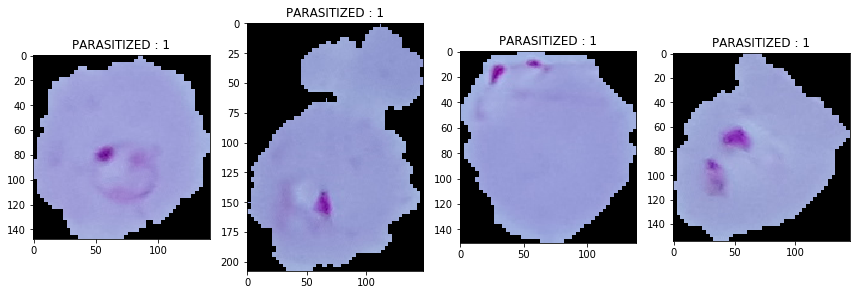

In [6]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(r"C:\Users\krish\Desktop\Subjects\ADS\MalariaImages\cell-images-for-detecting-malaria\cell_images\cell_images/Parasitized" + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

The below code will read the images and randomly select 4 images from the uninfected folder and display them 

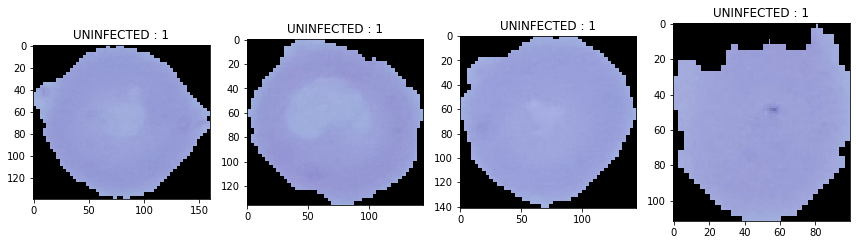

In [7]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(r"C:\Users\krish\Desktop\Subjects\ADS\MalariaImages\cell-images-for-detecting-malaria\cell_images\cell_images/Uninfected" + "/" + uninfected_data[i])
    plt.imshow(img)
    plt.title('UNINFECTED : 1')
    plt.tight_layout()
plt.show()

In the below code, we read the image into the img_read variable and resize all the images into a 50x50 pixel size which are then converted to a 3D array with the img_to_array function and then we store the images in the data array that we defined earlier and we store the respective labels in the labels array that was also defined earlier. So each image is read from the folder, resized and converted into a 3D array and then appended to the data and labels. 

In [8]:
data = []
labels = []
for img in parasitized_data:
    try:
        img_read = plt.imread((r"C:\Users\krish\Desktop\Subjects\ADS\MalariaImages\cell-images-for-detecting-malaria\cell_images\cell_images/Parasitized" + "/" + img))
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread((r"C:\Users\krish\Desktop\Subjects\ADS\MalariaImages\cell-images-for-detecting-malaria\cell_images\cell_images/Uninfected" + "/" + img))
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

Showing an image from the data folder along with its label

1


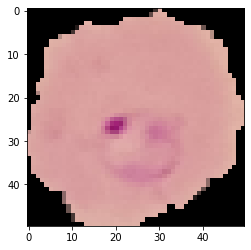

In [32]:
plt.imshow(data[0])
print(labels[0])
plt.show()

Then we add all the images data and the labels to the images_data and labels variables and after that we shuffle them to ensure randomness in the data.

In [10]:
image_data = np.array(data)
labels = np.array(labels)

In [11]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

After shuffling our data, we divide our dataset into 2 parts - training set and test set where we divide our data to into 80% training data and 20% testing data. Since our dataset is comprised of 27,556 images, this will amount to 22,046 training images and 5,512 test images.

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 101)

In [13]:
y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

In [14]:
print(f'SHAPE OF TRAINING IMAGE DATA : {x_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {x_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (22046, 50, 50, 3)
SHAPE OF TESTING IMAGE DATA : (5512, 50, 50, 3)
SHAPE OF TRAINING LABELS : (22046, 2)
SHAPE OF TESTING LABELS : (5512, 2)


Now we make the model to classify our data

##### Convolution Layer
The convolution layer computes the output of neurons that are connected to local regions or receptive fields in the input, each computing a dot product between their weights and a small receptive field to which they are connected to in the input volume. Each computation leads to extraction of a feature map from the input image. 

##### Maxpooling Layer
After the convolution layer comes the pooling layer, where the spatial size of the convoluted features will be attempted to be reduced. The reduction in complexity, sometimes known as dimensionality reduction will decrease the computational cost of performing analysis on the data set, allowing the method to be more robust. In this layer, a kernel once again passes over all subsets of pixels of the image. There are two types of pooling kernels which are commonly used. The first one is Max Pooling, which retains the maximum value of the subset. The alternative kernel is average pooling. Here we use a 2x2 matrix to pass over all the pixels in the image. 

##### Flatten
We have to flatten the 3D tensor to 1D vector before applying it to softmax. The flattening is done by changing the matrix of pixels into a vector of pixels, which can then be used for the neural net model.

##### Dense Layer
A dense layer is the implementation of the equation output = activation(dot(input, kernel) + bias). This means that we are taking the dot product between our input tensor and whatever the weight kernel matrix is featured in our dense layer. Then, we add a bias vector (if we want to have a bias) and take an element-wise activation of the output values (some sort of function, linear or, more often, non-linear!).The units are the most basic parameter to understand. This parameter is a positive integer that denotes the output size of the layer. It’s the most important parameter we can set for this layer. The unit parameter actually dictates the size of the weight matrix and bias vector (the bias vector will be the same size, but the weight matrix will be calculated based on the size of the input data so that the dot product will produce data that is of output size, units). 
Activation sets the element-wise activation function to be used in the dense layer. We use Relu here

##### Softmax
A Softmax function is a type of squashing function. Squashing functions limit the output of the function into the range 0 to 1. This allows the output to be interpreted directly as a probability. Similarly, softmax functions are multi-class sigmoids, meaning they are used in determining probability of multiple classes at once. Since the outputs of a softmax function can be interpreted as a probability (i.e.they must sum to 1), a softmax layer is typically the final layer used in neural network functions. 


In [17]:
def CNNbuild(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(Conv2D(64, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model

We know that the size of the images is 50x50 so we set the height and width to 50. We also set the classes to 2 as we have 2 classes here to categorize our data into - Parasitized and Uninfected. The channel has been set to 3 because the images that we are using are rgb images rather than b/w images so we set the channel to 3.

In [18]:
#instantiate the model
height = 50
width = 50
classes = 2
channels = 3
model = CNNbuild(height = height, width = width, classes = classes, channels = channels)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 11, 32)       

To make sure that our model gives us the best results, we set epochs = 20 as an arbitrary value so that our model can reiterate and get proper weights as needed. We also use the Adam optimizer which is the standard optimizer for neural networks. Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data. We also use the categorial crossentropy as our loss function.

We also set the loss function to categorical cross entropy as that is the standard loss function for multiclass classification problems and it calculates the difference between two probability distributions and gives us a number to process the results. We also monitor the accuracy of the model as each epoch goes by

In [19]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

Epoch 1/20
22046/22046 [==============================] - 522s 24ms/step - loss: 0.5012 - accuracy: 0.8012
Epoch 2/20
22046/22046 [==============================] - 522s 24ms/step - loss: 0.2085 - accuracy: 0.9246
Epoch 3/20
22046/22046 [==============================] - 551s 25ms/step - loss: 0.1819 - accuracy: 0.9394
Epoch 4/20
22046/22046 [==============================] - 564s 26ms/step - loss: 0.1677 - accuracy: 0.9448
Epoch 5/20
22046/22046 [==============================] - 562s 26ms/step - loss: 0.1639 - accuracy: 0.9472
Epoch 6/20
22046/22046 [==============================] - 564s 26ms/step - loss: 0.1596 - accuracy: 0.9485
Epoch 7/20
22046/22046 [==============================] - 565s 26ms/step - loss: 0.1592 - accuracy: 0.9477
Epoch 8/20
22046/22046 [==============================] - 563s 26ms/step - loss: 0.1540 - accuracy: 0.9505
Epoch 9/20
22046/22046 [==============================] - 564s 26ms/step - loss: 0.1518 - accuracy: 0.9498
Epoch 10/20
22046/22046 [============

Text(0.5, 1.0, '')

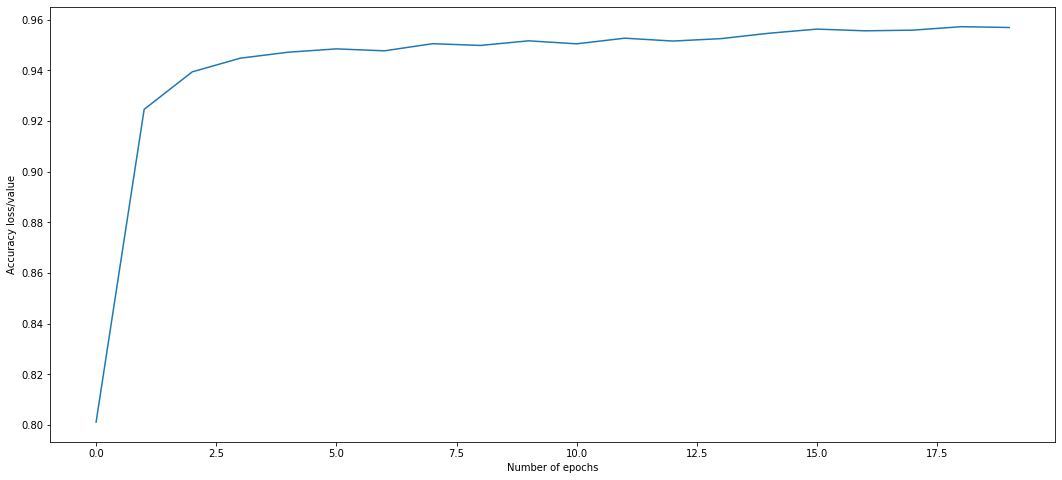

In [20]:
#fit the model onto the dataset
h = model.fit(x_train, y_train, epochs = 20, batch_size = 32)
validation_set = model.fit(x_train,y_train, epochs = 20, batch_size = 32)
plt.figure(figsize =(18,8))
plt.plot(range(20),h.history['accuracy'], label = 'training accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy loss/value')
plt.title('')

Now we plot the different generated metrics of the model to evaluate the results of the model on our dataset. 

Plotting the model accuracy, we can see that the accuracy plateaus after 3 epochs but it slowly but surely increases. 
Similar can be said about the loss as it decreases drastically after 2 epochs and continues decreasing slowly gradually

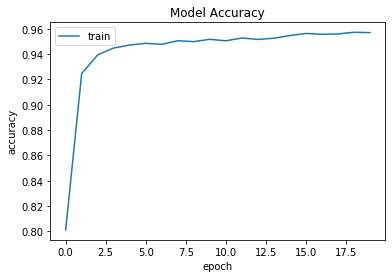

In [43]:
plt.plot(h.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

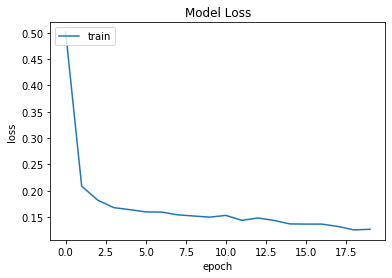

In [30]:
# summarize history for loss
plt.plot(h.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

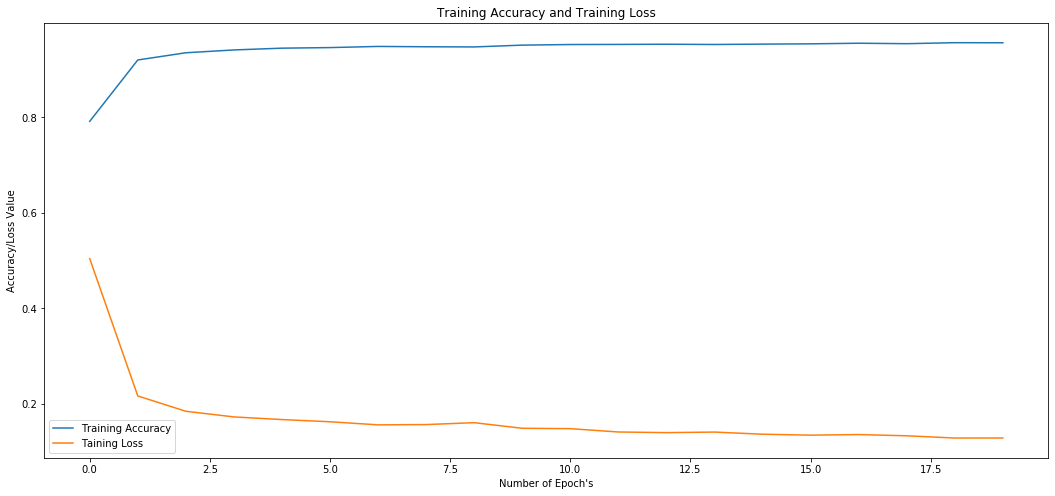

In [21]:
plt.figure(figsize = (18,8))
plt.plot(range(20), h.history['accuracy'], label = 'Training Accuracy')
plt.plot(range(20), h.history['loss'], label = 'Taining Loss')
#ax1.set_xticks(np.arange(0, 31, 5))
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")

In [23]:
#predictions = 
model.evaluate(x_test, y_test)

5512/5512 [==============================] - 65s 12ms/step


[0.1352981656833034, 0.9608127474784851]

In [24]:
print(f'LOSS : {predictions[0]}')
print(f'ACCURACY : {predictions[1]}')


LOSS : 0.1352981656833034
ACCURACY : 0.9608127474784851


After evaluating the model we get a loss of 0.135 and accuracy os 0.9608 which translates to a loss of 13.5% and accuracy of 96.08% which means that our model did well on the dataset we had and can make accurate predictions on new data.

In [27]:
y_pred=model.predict(x_test)
y_pred =(y_pred>0.5)

In [28]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(classes)]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.93      0.98      0.96      2718
     Class 1       0.98      0.93      0.96      2794

   micro avg       0.96      0.96      0.96      5512
   macro avg       0.96      0.96      0.96      5512
weighted avg       0.96      0.96      0.96      5512
 samples avg       0.96      0.96      0.96      5512



Classification report will help us in identifying the misclassified classes in more detail. We will be able to observe for which class the model performed bad out of the given two classes.

From the classification report we can see that the model did well on both the classes.

### Model with preprocessed images

Using little data is possible when the image is preprocessing with Keras ImageDataGenerator class. Тhis class can create a number of random transformations, which helps to increase the number of images when it is needed. from keras.preprocess. We set the rotation range to 30 which is used for random rotations in the range from 0 to 180. We set the width_shift_range as 0.2 which is shown in fraction of total width, used for random horizontal shifts. We set the height_shift_range as 0.2 which is the same as width_shift_range, but with height. And we set the horizontal_flip to True and it is used for randomly flipping inputs horizontally. All this is done to preprocess our images and make the training of our model better.


Then we train the same model with the preprocessed data and evaluate the results

In [35]:
from keras.preprocessing.image import ImageDataGenerator

In [36]:
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                  horizontal_flip = True,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  fill_mode = 'nearest',
                                  zoom_range = 0.3,
                                  rotation_range = 30)
val_datagen = ImageDataGenerator(rescale = 1/255.)

train_generator = train_datagen.flow(x_train, y_train, batch_size = 64, shuffle = False)
val_generator = val_datagen.flow(x_test, y_test, batch_size = 64, shuffle = False)

In [37]:
#calling the same model as above
model_aug = CNNbuild(height = height, width = width, classes = classes, channels = channels)

In [38]:
#compile the model
optim = optimizers.Adam(lr = 0.001, decay = 0.001 / 64)
model_aug.compile(loss = 'categorical_crossentropy', optimizer = optim, metrics = ['accuracy'])

In [39]:
#fit the model on the augmented dataset
h_aug = model_aug.fit_generator(train_generator, steps_per_epoch = len(x_train) // 64, epochs = 50)

Epoch 1/50
344/344 [==============================] - 347s 1s/step - loss: 0.8167 - accuracy: 0.6039
Epoch 2/50
344/344 [==============================] - 350s 1s/step - loss: 0.5797 - accuracy: 0.7044
Epoch 3/50
344/344 [==============================] - 354s 1s/step - loss: 0.4360 - accuracy: 0.8028
Epoch 4/50
344/344 [==============================] - 352s 1s/step - loss: 0.3566 - accuracy: 0.8504
Epoch 5/50
344/344 [==============================] - 355s 1s/step - loss: 0.3194 - accuracy: 0.8717
Epoch 6/50
344/344 [==============================] - 354s 1s/step - loss: 0.3038 - accuracy: 0.8804
Epoch 7/50
344/344 [==============================] - 354s 1s/step - loss: 0.2850 - accuracy: 0.8929
Epoch 8/50
344/344 [==============================] - 360s 1s/step - loss: 0.2848 - accuracy: 0.8921
Epoch 9/50
344/344 [==============================] - 356s 1s/step - loss: 0.2728 - accuracy: 0.9000
Epoch 10/50
344/344 [==============================] - 357s 1s/step - loss: 0.2660 - accura

In [40]:
predict = model_aug.evaluate_generator(val_generator, steps = 5)

In [41]:
print(f'LOSS ON TEST DATA AFTER DATA AUGMENTATION : {predict[0]}')
print(f'ACCURACY ON TEST DATA AFTER DATA AUGMENTATION : {predict[1]}')

LOSS ON TEST DATA AFTER DATA AUGMENTATION : 0.3098805546760559
ACCURACY ON TEST DATA AFTER DATA AUGMENTATION : 0.890625


In [42]:
model_aug.evaluate_generator(val_generator, steps = 5)

[0.3098805546760559, 0.890625]

Evaluating the model after using the ImageDataGenerator and preprocessing the images, we get a loss of 0.309 and accuracy of 0.8906 which translates to 30.9% loss and 89.06% accuracy. 

From these results, we can see that our model performed better on the dataset without preprocessing the images.

## Conclusion

The baseline CNN model gave us the accuracy of 96.081%, and a loss of 13.5%. We used the Adam optimizer for this model with Categorical Cross entropy loss function. 20 epochs were used to train the model where the model accuracy increased drastically till 3 epochs and then increased slowly. Next, we also trained a model using images that were preprocessed using the Keras ImageDataGenerator class. This model also did well on the data with 86.06% accuracy and 30.95 loss however, our baseline model with the original unprocessed images did a lot better than this model. 

## References

[CDC data](https://www.cdc.gov/malaria/about/index.html)

[WHO data - 1](https://www.who.int/news-room/fact-sheets/detail/malaria#:~:text=Disease%20burden,405%20000%20deaths%20in%202018.)
    
[WHO data - 2](https://www.cdc.gov/malaria/diagnosis_treatment/diagnosis.html)

[Optimizers](https://www.dlology.com/blog/quick-notes-on-how-to-choose-optimizer-in-keras/)

[Epochs](https://deepai.org/machine-learning-glossary-and-terms/epoch)

[Loss Functions](https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/)

[Activation Functions - 1](https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f)

[Activation Functions - 2](https://medium.com/datadriveninvestor/building-neural-network-using-keras-for-classification-3a3656c726c1)

[Image DataGen](https://medium.com/@ksusorokina/image-classification-with-convolutional-neural-networks-496815db12a8)

## License


MIT License

Copyright (c) 2020 Krisha Shah

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.